In [5]:
%reload_ext mocodo

Mocodo 3.2.1 loaded.


# Basic

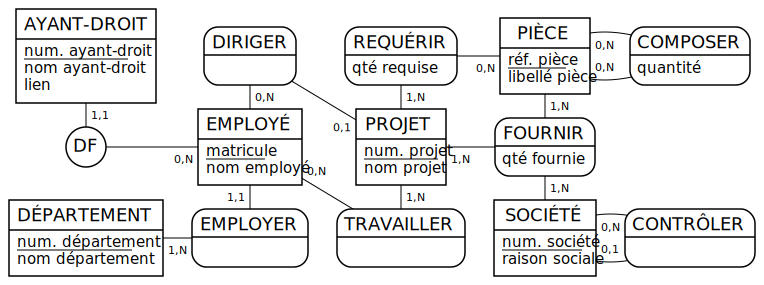

In [85]:
%%mocodo
% Tutoriel interactif (1/2)
% Un petit zoo de la syntaxe de Mocodo, avec quelques possibilités de base :
% entité, association, attribut, identifiant, cardinalité, patte, rôle.
% 
% MCD adapté de : The entity-relationship model—toward a unified view of data
% (Chen, 1976).

AYANT-DROIT: num. ayant-droit, nom ayant-droit, lien
DIRIGER, 0N [responsable] EMPLOYÉ, 01 PROJET
REQUÉRIR, 1N PROJET, 0N PIÈCE: qté requise
PIÈCE: réf. pièce, libellé pièce
COMPOSER, 0N [composée] PIÈCE, 0N [composante] PIÈCE: quantité

DF, 11 AYANT-DROIT, 0N EMPLOYÉ
EMPLOYÉ: matricule, nom employé
PROJET: num. projet, nom projet
FOURNIR, 1N PROJET, 1N PIÈCE, 1N SOCIÉTÉ: qté fournie

DÉPARTEMENT: num. département, nom département
EMPLOYER, 11 EMPLOYÉ, 1N DÉPARTEMENT
TRAVAILLER, 0N EMPLOYÉ, 1N PROJET
SOCIÉTÉ: num. société, raison sociale
CONTRÔLER, 0N [mère] SOCIÉTÉ, 01 [filiale] SOCIÉTÉ

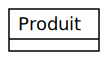

In [3]:
%%mocodo
% Entité
% Pour créer une entité E, écrivez sur une ligne « E: ».
% Bon à savoir : les lignes commençant par « % » sont des commentaires.

Produit:

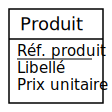

In [50]:
%%mocodo
% Identifiant et attributs d'entité
% Donnez-lui des attributs en écrivant « E: attr_1, attr_2, ... ».
% Astuce : tapez [↓], [↓], [⏎] pour passer à l'exemple suivant.

Produit: Réf. produit, Libellé, Prix unitaire

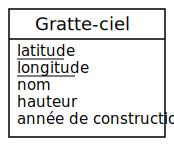

In [77]:
%%mocodo
% Identifiant composite
% Vous avez remarqué que, par défaut, le premier attribut est considéré comme
% un identifiant, et donc souligné. Pour souligner d'autres attributs, il faut
% les préfixer d'un tiret bas.

Gratte-ciel: latitude, _longitude, nom, hauteur, année de construction

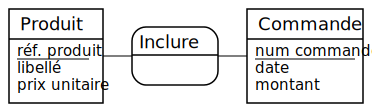

In [5]:
%%mocodo
% Association
% Pour une association A entre plusieurs entités E1, E2, ..., écrivez sur une
% ligne « A, XX E1, XX E2, ... ».

Produit: réf. produit, libellé, prix unitaire
Inclure, XX Commande, XX Produit
Commande: num. commande, date, montant

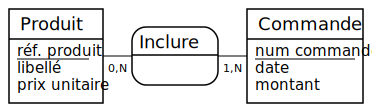

In [4]:
%%mocodo
% Cardinalités
% Si vous connaissez le couple de cardinalités d'une patte, mettez 01, 11, 0N
% ou 1N à la place du XX de l'entité distinguée par cette patte.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit
Commande: num. commande, date, montant

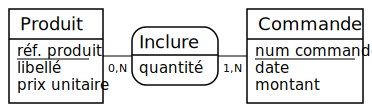

In [7]:
%%mocodo
% Attribut d'association
% Pour ajouter des attributs à une association, faites comme pour une entité :
% mettez un deux-points au bout de la ligne, puis listez les attributs en les
% séparant par des virgules.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant

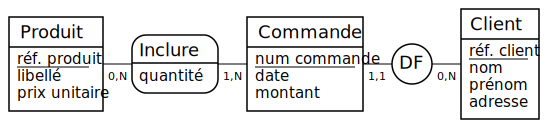

In [8]:
%%mocodo
% Association de dépendance fonctionnelle
% Si votre association a une cardinalité 11, mais aucun attribut, vous pouvez
% la nommer « DF » : Mocodo la représentera par un cercle.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse

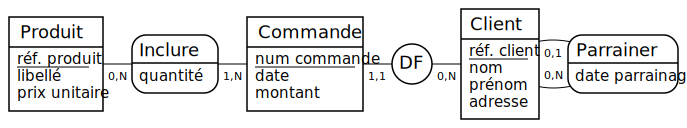

In [10]:
%%mocodo
% Association réflexive
% En répétant le nom d'une entité dans la définition d'une association, vous
% rendez celle-ci réflexive.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

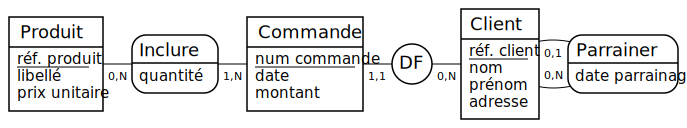

<!-- Generated by Mocodo 4.0.0 -->

- **Client** (<ins>réf. client</ins>, nom, prénom, adresse, _#réf. client 2_, date parrainage)
- **Commande** (<ins>num commande</ins>, date, montant, _#réf. client_)
- **Inclure** (<ins>_#num commande_</ins>, <ins>_#réf. produit_</ins>, quantité)
- **Produit** (<ins>réf. produit</ins>, libellé, prix unitaire)


In [56]:
%%mocodo --mld
% Schéma relationnel
% Sous l'onglet Options, cochez « Schéma relationnel en HTML avec explications
% escamotables », puis rafraîchissez la figure : une liste des tables apparaît
% au-dessous. Cliquez sur n'importe quelle ligne pour mieux comprendre comment
% elle a été obtenue. Dans la table « Client », remarquez les colonnes « Réf.
% client » et « Réf. client 2 » : ce n'est pas très satisfaisant.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

In [55]:
%%mocodo -t mld
% Rôles
% Dans ce MCD, on a ajouté la chaîne « parrain » sur la patte 0,N de PARRAINER.
% Cette technique permet de préserver la sémantique des associations disparues.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N [parrain] Client : date parrainage


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


<!-- Generated by Mocodo 4.0.0 -->

- **Client** (<ins>réf. client</ins>, nom, prénom, adresse, _#réf. client parrain_, date parrainage)
- **Commande** (<ins>num commande</ins>, date, montant, _#réf. client_)
- **Inclure** (<ins>_#num commande_</ins>, <ins>_#réf. produit_</ins>, quantité)
- **Produit** (<ins>réf. produit</ins>, libellé, prix unitaire)


In [43]:
%%mocodo -t diagram
% Diagramme relationnel (1)
% Cochez « Diagramme relationnel en Mocodo », rafraîchissez la figure et allez
% sous l'onglet Autres sorties. Vous y trouvez un texte-source que vous pouvez
% copier-coller (⧉) ici pour voir apparaître un autre type de schéma.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N [parrain] Client : date parrainage


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.svg
</tt>
</span>
</div>


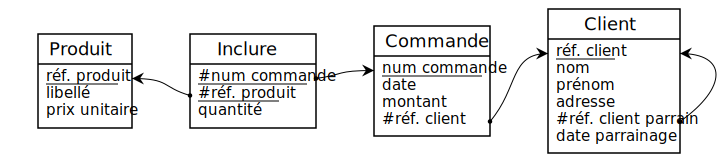

In [44]:
%%mocodo
% Diagramme relationnel (2)
% Voici le résultat de la manipulation précédente. Les associations ont cédé la
% place à des flèches entre les clés étrangères et les clés primaires d'origine.

:
Produit: réf. produit, libellé, prix unitaire
:
Inclure: #num. commande > Commande > num. commande, _#réf. produit > Produit > réf. produit, quantité
:
Commande: num. commande, date, montant, #réf. client > Client > réf. client
:
Client: réf. client, nom, prénom, adresse, #réf. client parrain > Client > réf. client, date parrainage
:

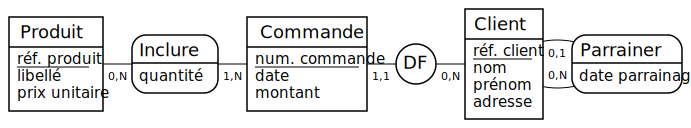


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox.mcd
</tt>
</span>
</div>


%%mocodo 
% Inférence de types
% Faites un clic long sur le lapin magique, puis sélectionnez : « deviner les
% types à partir du nom des attributs » (en français ou en anglais). Bien sûr,
% vous pourrez toujours rectifier ceux-ci au besoin.

Produit: réf. produit [VARCHAR(8)], libellé [VARCHAR(50)], prix unitaire [DECIMAL(10,2)]
Inclure, 1N Commande, 0N Produit: quantité [INTEGER]
Commande: num. commande [VARCHAR(8)], date [DATE], montant [DECIMAL(10,2)]
DF, 0N Client, 11 Commande
Client: réf. client [VARCHAR(8)], nom [VARCHAR(255)], prénom [VARCHAR(255)], adresse [VARCHAR(30)]
Parrainer, 01 Client, 0N [parrain] Client : date parrainage [DATE]


In [15]:
%%mocodo -t guess:types
% Inférence de types
% Faites un clic long sur le lapin magique, puis sélectionnez : « deviner les
% types à partir du nom des attributs » (en français ou en anglais). Bien sûr,
% vous pourrez toujours rectifier ceux-ci au besoin.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N [parrain] Client : date parrainage

In [48]:
%%mocodo -t sql
% Génération du DDL
% Maintenant que le MCD est typé, cochez « Requêtes SQL de création des tables »,
% rafraîchissez et allez voir le résultat sous l'onglet Autres sorties. Notez en
% particulier les contraintes de clés étrangères à la fin. Notez aussi que les
% les libellés originels ont été purgés de leurs accents et de leurs espaces :
% cela rend le code SQL plus portable et simplifie l'utilisation de la base.

Produit: réf. produit [VARCHAR(8)], libellé [VARCHAR(50)], prix unitaire [DECIMAL(10,2)]
Inclure, 1N Commande, 0N Produit: quantité [INTEGER]
Commande: num. commande [VARCHAR(8)], date [DATE], montant [DECIMAL(10,2)]
DF, 0N Client, 11 Commande
Client: réf. client [VARCHAR(8)], nom [VARCHAR(255)], prénom [VARCHAR(255)], adresse [VARCHAR(30)]
Parrainer, 01 Client, 0N [parrain] Client : date parrainage [DATE]


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
-- Generated by Mocodo 4.0.0

CREATE TABLE CLIENT (
  PRIMARY KEY (ref_client),
  ref_client VARCHAR(8) NOT NULL,
  nom VARCHAR(255),
  prenom VARCHAR(255),
  adresse VARCHAR(30),
  ref_client_parrain VARCHAR(8) NULL,
  date_parrainage DATE
);

CREATE TABLE COMMANDE (
  PRIMARY KEY (num_commande),
  num_commande VARCHAR(8) NOT NULL,
  date DATE,
  montant DECIMAL(10,2),
  ref_client VARCHAR(8) NOT NULL
);

CREATE TABLE INCLURE (
  PRIMARY KEY (num_commande, ref_produit),
  num_commande VARCHAR(8) NOT NULL,
  ref_produit VARCHAR(8) NOT NULL,
  quantite INTEGER
);

CREATE TABLE PRODUIT (
  PRIMARY KEY (ref_produit),
  ref_produit VARCHAR(8) NOT NULL,
  libelle VARCHAR(50),
  prix_unitaire DECIMAL(10,2)
);

ALTER TABLE CLIENT ADD FOREIGN KEY (ref_client_parrain) REFERENCES CLIENT (ref_client);

ALTER TABLE COMMANDE ADD FOREIGN KEY (ref_client) REFERENCES CLIENT (ref_client);

ALTER TABLE INCLURE ADD FOREIGN KEY (ref_produit) REFERENCES PRODUIT (ref_produit);
ALTER TABLE INCLURE ADD FOREIGN KEY (num_commande) REFERENCES COMMANDE (num_commande);

```

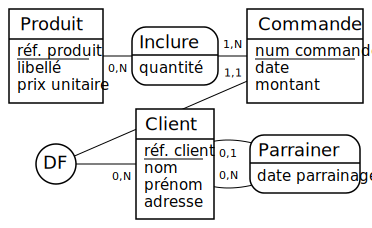

In [13]:
%%mocodo
% Schéma sur plusieurs rangées
% Pour finir la première partie du tutoriel, quelques notions de mise en page.
% Les boîtes (entités et association) définies sur des lignes consécutives sont
% alignées horizontalement sur la même rangée d'une grille invisible. Pour créer
% une nouvelle rangée, il suffit de sauter une ligne entre deux clauses.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

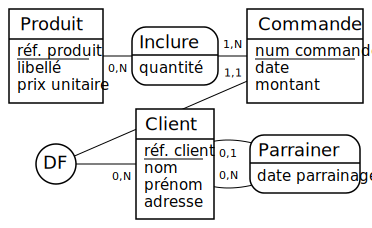

In [20]:
%%mocodo
% Réorganisation automatique
% Quand le schéma devient confus, cliquez sur la tablette de chocolat pour le
% réorganiser aléatoirement. L'algorithme veille à éviter les croisements et
% à minimiser la longueur des pattes. Essayez !

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

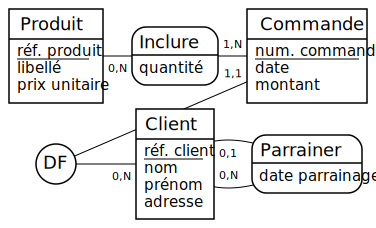

In [63]:
%%mocodo
% Réorganisation automatique avec contraintes
% Un clic long sur la tablette de chocolat fait apparaître d'autres options de
% réorganisation. Elles tentent de plonger le MCD sur la grille actuelle, ou en
% largeur d'abord (pour un document paginé), ou en équilibrant les dimensions
% (pour un diaporama).

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant

DF, 0N Client, 11 Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01 Client, 0N Client : date parrainage

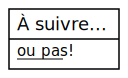

In [73]:
%%mocodo
% Pour aller plus loin...
% Si vous débutez dans les bases de données, les exemples précédents devraient
% suffire à votre bonheur. Dans le cas contraire, cochez l'option « Tutoriel
% interactif (2/2) » et revenez ici.

À suivre...: ou pas!

# Advanced

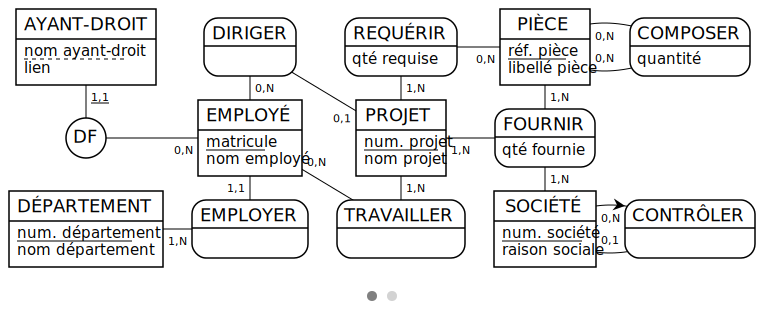

<!-- Generated by Mocodo 4.0.0 -->

- **AYANT-DROIT** (<ins>_#matricule_</ins>, <ins>nom ayant-droit</ins>, lien)
- **COMPOSER** (<ins>_#réf. pièce composée_</ins>, <ins>_#réf. pièce composante_</ins>, quantité)
- **DÉPARTEMENT** (<ins>num. département</ins>, nom département)
- **EMPLOYÉ** (<ins>matricule</ins>, nom employé, _#num. département_)
- **FOURNIR** (<ins>_#num. projet_</ins>, <ins>_#réf. pièce_</ins>, <ins>_#num. société_</ins>, qté fournie)
- **PIÈCE** (<ins>réf. pièce</ins>, libellé pièce)
- **PROJET** (<ins>num. projet</ins>, nom projet, _#matricule responsable_)
- **REQUÉRIR** (<ins>_#num. projet_</ins>, <ins>_#réf. pièce_</ins>, qté requise)
- **SOCIÉTÉ** (<ins>num. société</ins>, raison sociale, _#num. société mère_)
- **TRAVAILLER** (<ins>_#matricule_</ins>, <ins>_#num. projet_</ins>)


In [89]:
%%mocodo --mld
% Tutoriel interactif (2/2)
% Une variation du MCD de Chen avec deux notions plus avancées : entité faible
% et contrainte sur associations ; ainsi que trois nouvelles fonctionnalités :
% flèches, calques, messages au survol.

AYANT-DROIT: nom ayant-droit, lien
DIRIGER, 0N [responsable] EMPLOYÉ, 01 PROJET
REQUÉRIR, 1N PROJET, 0N PIÈCE: qté requise
PIÈCE: réf. pièce, libellé pièce
COMPOSER, 0N [composée] PIÈCE, 0N [composante] PIÈCE: quantité

DF, _11 AYANT-DROIT, 0N EMPLOYÉ
EMPLOYÉ: matricule, nom employé
PROJET: num. projet, nom projet
FOURNIR, 1N PROJET, 1N PIÈCE, 1N SOCIÉTÉ: qté fournie

DÉPARTEMENT: num. département, nom département
EMPLOYER, 11 EMPLOYÉ, 1N DÉPARTEMENT
TRAVAILLER, 0N EMPLOYÉ, 1N PROJET
SOCIÉTÉ: num. société, raison sociale
CONTRÔLER, 0N< [mère] SOCIÉTÉ, 01 [filiale] SOCIÉTÉ

  (I) [Les pièces fournies par une société pour un projet font partie de celles qu'il requiert.] ..PIÈCE, ->REQUÉRIR, --FOURNIR, PROJET

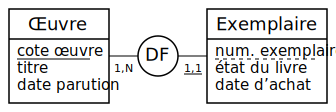

In [130]:
%%mocodo
% Entité faible (ou identification relative)
% Préfixez d'un tiret bas une cardinalité 11 pour « affaiblir » l'entité qu'elle
% distingue, et dont l'identifiant sera alors souligné en pointillés.
%
% NB. De façon non conventionnelle, Mocodo souligne le 11 pour indiquer que le
% « renforcement » de l'identifiant va passer par là. Voyez la documentation
% pour des options alternatives.

Œuvre: cote œuvre, titre, date parution
DF, 1N Œuvre, _11 Exemplaire
Exemplaire: num. exemplaire, état du livre, date d'achat

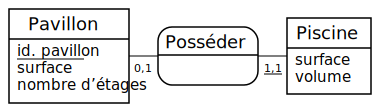

In [92]:
%%mocodo
% Entité faible sans identifiant
% Préfixez d'un tiret bas le premier attribut pour l'exclure de l'identifiant,
% p. ex. pour une entité faible sans discriminant.

Pavillon: id. pavillon, surface, nombre d'étages
Posséder, 01 Pavillon, _11 Piscine
Piscine: _surface, volume

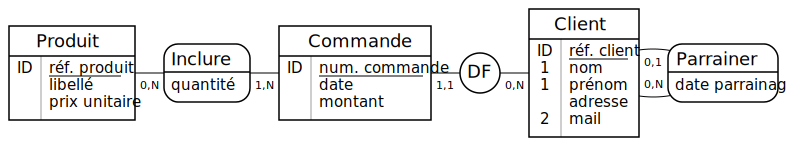

In [91]:
%%mocodo
% Identifiants candidats
% Préfixez d'un « i_ » les attributs formant le ième identifiant alternatif.
% Ce numéro apparaîtra dans une gouttière latérale, ainsi qu'un symbole ID en
% face des attributs que vous avez retenus pour l'identifiant. Le code SQL
% généré inclura une contrainte d'unicité pour chacun des groupes concernés.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11 Commande
Client: réf. client, 1_nom, 1_prénom, adresse, 2_mail
Parrainer, 01 Client, 0N [parrain] Client : date parrainage

In [102]:
%%mocodo -t mld sql
% Héritage (ou spécialisation)
% Pour spécialiser une entité E en une ou plusieurs autres entités E1, E2, ...
% écrivez « /\ E <- E1, E2, ... ».
%
% NB. Vous pouvez insérer X (exclusion) et/ou T (totalité) entre les barres
% obliques, ajouter une liste d'attributs ou modifier la sémantique et/ou la
% représentation graphique de l'héritage en remplaçant la flèche par <=, ->,
% =>, <<=, <<-, ->> =>>. Voir la documentation.

Client: réf. client, nom, prénom, adresse

/X\ Client <- Particulier, Employé, Administratif

Particulier:
Employé: siret entreprise
Administratif: nom ministère


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


<!-- Generated by Mocodo 4.0.0 -->

- **Client** (<ins>réf. client</ins>, nom, prénom, adresse, siret entreprise, nom ministère)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
-- Generated by Mocodo 4.0.0

CREATE TABLE CLIENT (
  PRIMARY KEY (ref_client),
  ref_client VARCHAR(42) NOT NULL,
  nom VARCHAR(42),
  prenom VARCHAR(42),
  adresse VARCHAR(42),
  siret_entreprise VARCHAR(42) NULL,
  nom_ministere VARCHAR(42) NULL
);

```

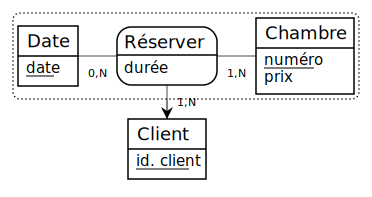


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


<!-- Generated by Mocodo 4.0.0 -->

- **Chambre** (<ins>numéro</ins>, prix)
- **Réserver** (<ins>_#numéro_</ins>, <ins>date</ins>, _#id. client!_, durée)


In [131]:
%%mocodo -t mld:c --select mcd mld
% Agrégation (ou pseudo-entité)
% Préfixez de « / » une cardinalité pour entourer d'une enveloppe pointillée
% l'association et les autres entités participantes.
% Ici, la dépendance fonctionnelle (date, numéro) => id. client se traduit au
% niveau relationnel par un identifiant réduit pour Réserver, ainsi qu'une
% contrainte de non-optionalité pour id. client. Les contraintes apparaissent
% dans les sorties SQL, mais vous pouvez aussi les visualiser au niveau du MLD
% en cochant l'option « Contraintes d'unicité et d'optionalité ».
%
% NB. La représentation usuelle (non prise en charge par Mocodo) insérerait
% une association entre Client et Réserver.

Date: date
Réserver, /1N Client, 1N Chambre, 0N Date: durée
Chambre: numéro, prix

Client: id. client

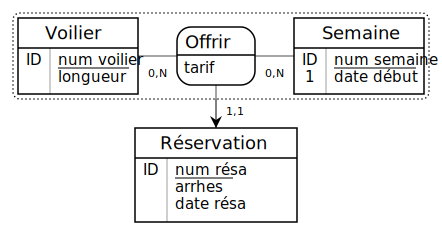


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_mld.md
</tt>
</span>
</div>


<!-- Generated by Mocodo 4.0.0 -->

- **Réservation** (<ins>num résa</ins>, arrhes, date résa, _#num voilier_ <sup>u1</sup>, _#num semaine_ <sup>u1</sup>, tarif)
- **Semaine** (<ins>num semaine</ins>, date début <sup>u1</sup>)
- **Voilier** (<ins>num voilier</ins>, longueur)



<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
-- Generated by Mocodo 4.0.0

CREATE TABLE RESERVATION (
  PRIMARY KEY (num_resa),
  num_resa VARCHAR(42) NOT NULL,
  arrhes VARCHAR(42),
  date_resa VARCHAR(42),
  num_voilier VARCHAR(42) NOT NULL,
  num_semaine VARCHAR(42) NOT NULL,
  tarif VARCHAR(42),
  UNIQUE (num_voilier, num_semaine)
);

CREATE TABLE SEMAINE (
  PRIMARY KEY (num_semaine),
  num_semaine VARCHAR(42) NOT NULL,
  date_debut VARCHAR(42),
  UNIQUE (date_debut)
);

CREATE TABLE VOILIER (
  PRIMARY KEY (num_voilier),
  num_voilier VARCHAR(42) NOT NULL,
  longueur VARCHAR(42)
);

ALTER TABLE RESERVATION ADD FOREIGN KEY (num_semaine) REFERENCES SEMAINE (num_semaine);
ALTER TABLE RESERVATION ADD FOREIGN KEY (num_voilier) REFERENCES VOILIER (num_voilier);

```

In [132]:
%%mocodo -t mld:c sql --select mcd mld
% Agrégation et contraintes d'unicité
% La conversion en relationnel d'un agrégat avec une cardinalité maximale 1
% ajoute une contrainte d'unicité sur la clé étrangère.

Voilier: num voilier, longueur
Offrir, 0N Voilier, 0N Semaine, /11 Réservation: tarif
Semaine: num semaine, 1_date début

Réservation: num résa, arrhes, date résa

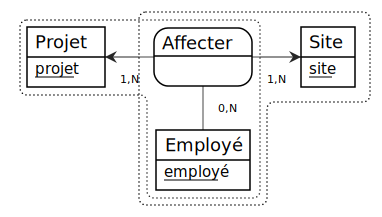

In [134]:
%%mocodo
% Agrégation multiple
% Mocodo gère correctement les cas difficiles à modéliser dans la notation Look
% Here de Merise. Par exemple, deux dépendances fonctionnelles simultanées :
% - (Projet, Employé) => Site.
% - (Employé, Site) => Projet.

Projet: projet
Affecter, /1N Site, /1N Projet, 0N Employé
Site: site

Employé: employé

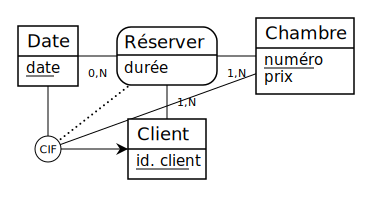

In [135]:
%%mocodo
% Contrainte d'intégrité fonctionnelle (CIF)
% Les mêmes cas de figure peuvent aussi être rendus visuellement par des CIF à
% unicité complète (le seul type de CIF pris en charge par Mocodo).

Date: date
Réserver, /1N Client, 1N Chambre, 0N Date: durée
Chambre: numéro, prix
    
Client: id. client
    
(CIF) ->Client, --Chambre, --Date, ..Réserver: Date, Client

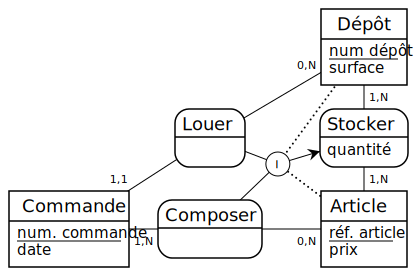

In [136]:
%%mocodo
% Autres contraintes sur associations
% Ajoutez à votre MCD diverses contraintes sous forme de lettres parenthésées
% et liées aux boîtes par des traits fléchés ou non, pleins ou pointillés, ou
% même invisibles. Ces contraintes sont purement décoratives, et ignorées lors
% du passage au relationnel.
%
% NB : par défaut, le centre de la contrainte coïncide avec le barycentre des
% boîtes qu'elle met en jeu.
%
% Source du MCD : Merise, deuxième génération (Nanci et Espinasse, 2001).

:::
Dépôt: num dépôt, surface

:
Louer, 11 Commande, 0N Dépôt
:
Stocker, 1N Dépôt, 1N Article: quantité

Commande: num. commande, date
Composer, 1N Commande, 0N Article
:
Article: réf. article, prix

(I) ->Stocker, ..Dépôt, ..Article, --Composer, --Louer, Commande, Stocker

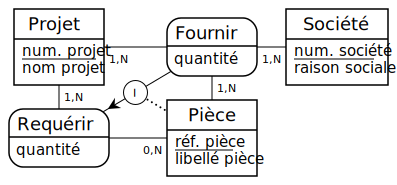

In [158]:
%%mocodo
% Explication interactive d'une contrainte
% Le survol d'une contrainte suivie d'un texte entre crochets affiche celui-ci
% dans un bandeau. Essayez !

Projet: num. projet, nom projet
:
Fournir, 1N Projet, 1N Pièce, 1N Société: quantité
Société: num. société, raison sociale

Requérir, 1N Projet, 0N Pièce: quantité
:
Pièce: réf. pièce, libellé pièce

(I) [Toute pièce fournie doit avoir été requise.] ..Pièce, ->Requérir, --Fournir, Projet

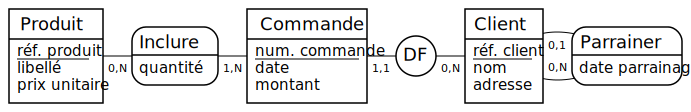

In [159]:
%%mocodo
% Explication interactive des cardinalités
% Même fonctionnalité pour les cardinalités. Si l'élément survolé est en bas
% du diagramme, le bandeau apparaît en haut, et vice versa.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N [Une commande inclut au moins un produit.] Commande, 0N [Un produit peut être commandé un nombre quelconque de fois.] Produit: quantité
Commande: num. commande, date, montant
DF, 0N [Un client peut passer zéro (prospect) ou plusieurs commandes.] Client, 11 [Une commande est passée par un et un seul client.] Commande
Client: réf. client, nom, adresse
Parrainer, 01 [Un client peut avoir été parrainé ou non.] Client, 0N [Un client peut parrainer d'autres clients.] Client : date parrainage

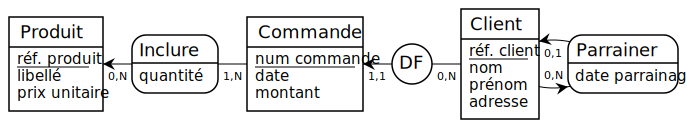

In [12]:
%%mocodo
% Flèche sur une patte
% En suffixant de « < » ou « > » des cardinalités, vous créez une flèche dont
% la direction se lit de l'association à l'entité.

Produit: réf. produit, libellé, prix unitaire
Inclure, 1N Commande, 0N> Produit: quantité
Commande: num. commande, date, montant
DF, 0N Client, 11> Commande
Client: réf. client, nom, prénom, adresse
Parrainer, 01> Client, 0N< Client : date parrainage

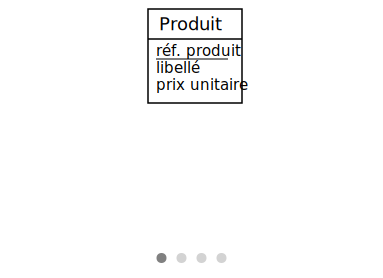

In [178]:
%%mocodo
% Dévoilement progressif du schéma
% Indentez (i.e., insérez des espaces au début de) certaines clauses pour créer
% des calques. Les boîtes définies avec la même indentation sont tracées sur le
% même calque. Les calques sont ordonnés par indentation croissante. Sous Mocodo
% online, pour faciliter la mise au point, le schéma est directement dévoilé.

      Parrainer, 01 Client, 0N Client : date parrainage
Produit: réf. produit, libellé, prix unitaire
  Inclure, 1N Commande, 0N Produit: quantité
 
    Client: réf. client, nom, prénom, adresse
    DF, 0N Client, 11 Commande
  Commande: num. commande, date, montant

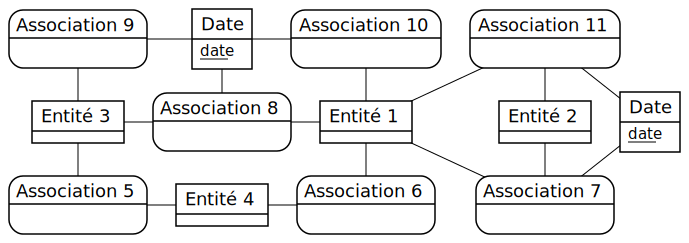

In [154]:
%%mocodo 
% Boîtes homonymes
% Le dernier chiffre ou tiret bas d'un nom d'entité ou d'association n'est pas
% affiché. C'est bon à savoir, p. ex. pour monnayer une entité « fictive » trop
% pattue : ici, on évite les croisements en créant deux entités Date.

Association 9_, XX Entité 3_, XX Date1
Date1: date
Association 10_, XX Entité 1_, XX Date1
Association 11_, XX Entité 1_, XX Entité 2_, XX Date2
:

Entité 3_:
Association 8_, XX Entité 3_, XX Entité 1_, XX Date1
Entité 1_:
Entité 2_:
Date2: date

Association 5_, XX Entité 4_, XX Entité 3_
Entité 4_:
Association 6_, XX Entité 4_, XX Entité 1_
Association 7_, XX Entité 1_, XX Entité 2_, XX Date2
:

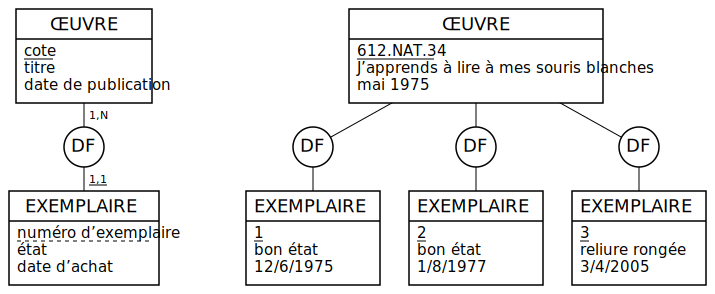

In [161]:
%%mocodo
% Vue en extension
% La même fonctionnalité permet de créer une vue en extension (à droite du MCD).
% Notez qu'il n'y a pas besoin de suffixe pour créer plusieurs associations DF.
% Notez également les lignes réduites à des deux-points : ceux-ci sont traités
% comme des boîtes « fantômes », et jouent le rôle d'espaces horizontaux.

ŒUVRE1: cote, titre, date de publication
:::
ŒUVRE2: 612.NAT.34, J'apprends à lire à mes souris blanches, mai 1975
:
  
DF, 1N ŒUVRE1, _11 EXEMPLAIRE1
::
DF, XX ŒUVRE2, XX EXEMPLAIRE2
DF, XX ŒUVRE2, XX EXEMPLAIRE3
DF, XX ŒUVRE2, XX EXEMPLAIRE4

EXEMPLAIRE1: numéro d'exemplaire, état, date d'achat
::
EXEMPLAIRE2: 1, bon état, 12/6/1975
EXEMPLAIRE3: 2, bon état, 1/8/1977
EXEMPLAIRE4: 3, reliure rongée, 3/4/2005

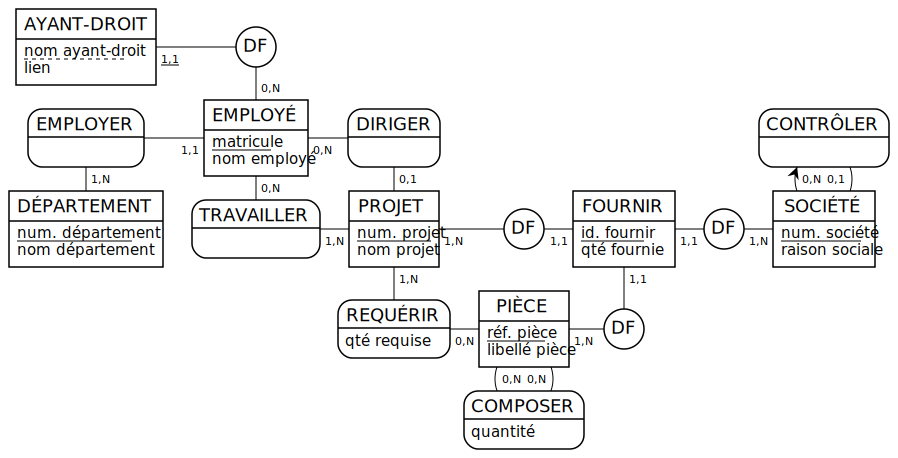


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
-- Generated by Mocodo 4.0.0

CREATE TABLE AYANT_DROIT (
  PRIMARY KEY (matricule, nom_ayant_droit),
  matricule VARCHAR(42) NOT NULL,
  nom_ayant_droit VARCHAR(42) NOT NULL,
  lien VARCHAR(42)
);

CREATE TABLE COMPOSER (
  PRIMARY KEY (ref_piece_composee, ref_piece_composante),
  ref_piece_composee VARCHAR(42) NOT NULL,
  ref_piece_composante VARCHAR(42) NOT NULL,
  quantite VARCHAR(42)
);

CREATE TABLE DEPARTEMENT (
  PRIMARY KEY (num_departement),
  num_departement VARCHAR(42) NOT NULL,
  nom_departement VARCHAR(42)
);

CREATE TABLE EMPLOYE (
  PRIMARY KEY (matricule),
  matricule VARCHAR(42) NOT NULL,
  nom_employe VARCHAR(42),
  num_departement VARCHAR(42) NOT NULL
);

CREATE TABLE FOURNIR (
  PRIMARY KEY (id_fournir),
  id_fournir VARCHAR(42) NOT NULL,
  qte_fournie VARCHAR(42),
  num_projet VARCHAR(42) NOT NULL,
  num_societe VARCHAR(42) NOT NULL,
  ref_piece VARCHAR(42) NOT NULL
);

CREATE TABLE PIECE (
  PRIMARY KEY (ref_piece),
  ref_piece VARCHAR(42) NOT NULL,
  libelle_piece VARCHAR(42)
);

CREATE TABLE PROJET (
  PRIMARY KEY (num_projet),
  num_projet VARCHAR(42) NOT NULL,
  nom_projet VARCHAR(42),
  matricule_responsable VARCHAR(42) NULL
);

CREATE TABLE REQUERIR (
  PRIMARY KEY (num_projet, ref_piece),
  num_projet VARCHAR(42) NOT NULL,
  ref_piece VARCHAR(42) NOT NULL,
  qte_requise VARCHAR(42)
);

CREATE TABLE SOCIETE (
  PRIMARY KEY (num_societe),
  num_societe VARCHAR(42) NOT NULL,
  raison_sociale VARCHAR(42),
  num_societe_mere VARCHAR(42) NULL
);

CREATE TABLE TRAVAILLER (
  PRIMARY KEY (matricule, num_projet),
  matricule VARCHAR(42) NOT NULL,
  num_projet VARCHAR(42) NOT NULL
);

ALTER TABLE AYANT_DROIT ADD FOREIGN KEY (matricule) REFERENCES EMPLOYE (matricule);

ALTER TABLE COMPOSER ADD FOREIGN KEY (ref_piece_composante) REFERENCES PIECE (ref_piece);
ALTER TABLE COMPOSER ADD FOREIGN KEY (ref_piece_composee) REFERENCES PIECE (ref_piece);

ALTER TABLE EMPLOYE ADD FOREIGN KEY (num_departement) REFERENCES DEPARTEMENT (num_departement);

ALTER TABLE FOURNIR ADD FOREIGN KEY (ref_piece) REFERENCES PIECE (ref_piece);
ALTER TABLE FOURNIR ADD FOREIGN KEY (num_societe) REFERENCES SOCIETE (num_societe);
ALTER TABLE FOURNIR ADD FOREIGN KEY (num_projet) REFERENCES PROJET (num_projet);

ALTER TABLE PROJET ADD FOREIGN KEY (matricule_responsable) REFERENCES EMPLOYE (matricule);

ALTER TABLE REQUERIR ADD FOREIGN KEY (ref_piece) REFERENCES PIECE (ref_piece);
ALTER TABLE REQUERIR ADD FOREIGN KEY (num_projet) REFERENCES PROJET (num_projet);

ALTER TABLE SOCIETE ADD FOREIGN KEY (num_societe_mere) REFERENCES SOCIETE (num_societe);

ALTER TABLE TRAVAILLER ADD FOREIGN KEY (num_projet) REFERENCES PROJET (num_projet);
ALTER TABLE TRAVAILLER ADD FOREIGN KEY (matricule) REFERENCES EMPLOYE (matricule);

```

In [172]:
%%mocodo -t explode arrange sql --seed=1 --select mcd sql
% Décomposition des associations ternaires (1)
% Cochez l'option « Bouton Décomposer » et cliquez celui-ci : l'association
% Fournir est remplacée par une entité de même nom pourvue d'un identifiant
% générique et assortie de trois DF.

AYANT-DROIT: nom ayant-droit, lien
DIRIGER, 0N [responsable] EMPLOYÉ, 01 PROJET
REQUÉRIR, 1N PROJET, 0N PIÈCE: qté requise
PIÈCE: réf. pièce, libellé pièce
COMPOSER, 0N [composée] PIÈCE, 0N [composante] PIÈCE: quantité

DF, _11 AYANT-DROIT, 0N EMPLOYÉ
EMPLOYÉ: matricule, nom employé
PROJET: num. projet, nom projet
FOURNIR, 1N PROJET, 1N PIÈCE, 1N SOCIÉTÉ: qté fournie

DÉPARTEMENT: num. département, nom département
EMPLOYER, 11 EMPLOYÉ, 1N DÉPARTEMENT
TRAVAILLER, 0N EMPLOYÉ, 1N PROJET
SOCIÉTÉ: num. société, raison sociale
CONTRÔLER, 0N< [mère] SOCIÉTÉ, 01 [filiale] SOCIÉTÉ

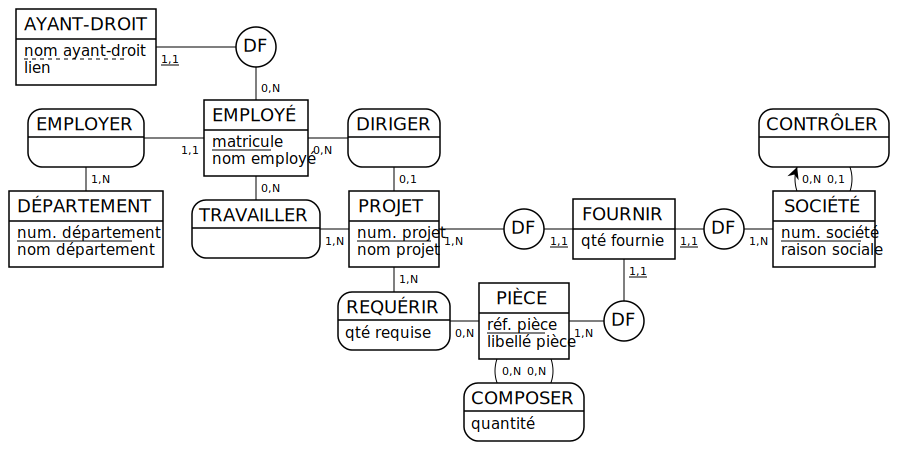


<div style="position: relative; height: 3ex; background-color: transparent">
<hr style="margin: 1ex 0 0 0; border-top: 1px solid #BBB">
<span style="position: absolute; right: 0; color: #BBB">
<tt>
sandbox_ddl.sql
</tt>
</span>
</div>


```sql
-- Generated by Mocodo 4.0.0

CREATE TABLE AYANT_DROIT (
  PRIMARY KEY (matricule, nom_ayant_droit),
  matricule VARCHAR(42) NOT NULL,
  nom_ayant_droit VARCHAR(42) NOT NULL,
  lien VARCHAR(42)
);

CREATE TABLE COMPOSER (
  PRIMARY KEY (ref_piece_composee, ref_piece_composante),
  ref_piece_composee VARCHAR(42) NOT NULL,
  ref_piece_composante VARCHAR(42) NOT NULL,
  quantite VARCHAR(42)
);

CREATE TABLE DEPARTEMENT (
  PRIMARY KEY (num_departement),
  num_departement VARCHAR(42) NOT NULL,
  nom_departement VARCHAR(42)
);

CREATE TABLE EMPLOYE (
  PRIMARY KEY (matricule),
  matricule VARCHAR(42) NOT NULL,
  nom_employe VARCHAR(42),
  num_departement VARCHAR(42) NOT NULL
);

CREATE TABLE FOURNIR (
  PRIMARY KEY (ref_piece, num_societe, num_projet),
  ref_piece VARCHAR(42) NOT NULL,
  num_societe VARCHAR(42) NOT NULL,
  num_projet VARCHAR(42) NOT NULL,
  qte_fournie VARCHAR(42)
);

CREATE TABLE PIECE (
  PRIMARY KEY (ref_piece),
  ref_piece VARCHAR(42) NOT NULL,
  libelle_piece VARCHAR(42)
);

CREATE TABLE PROJET (
  PRIMARY KEY (num_projet),
  num_projet VARCHAR(42) NOT NULL,
  nom_projet VARCHAR(42),
  matricule_responsable VARCHAR(42) NULL
);

CREATE TABLE REQUERIR (
  PRIMARY KEY (num_projet, ref_piece),
  num_projet VARCHAR(42) NOT NULL,
  ref_piece VARCHAR(42) NOT NULL,
  qte_requise VARCHAR(42)
);

CREATE TABLE SOCIETE (
  PRIMARY KEY (num_societe),
  num_societe VARCHAR(42) NOT NULL,
  raison_sociale VARCHAR(42),
  num_societe_mere VARCHAR(42) NULL
);

CREATE TABLE TRAVAILLER (
  PRIMARY KEY (matricule, num_projet),
  matricule VARCHAR(42) NOT NULL,
  num_projet VARCHAR(42) NOT NULL
);

ALTER TABLE AYANT_DROIT ADD FOREIGN KEY (matricule) REFERENCES EMPLOYE (matricule);

ALTER TABLE COMPOSER ADD FOREIGN KEY (ref_piece_composante) REFERENCES PIECE (ref_piece);
ALTER TABLE COMPOSER ADD FOREIGN KEY (ref_piece_composee) REFERENCES PIECE (ref_piece);

ALTER TABLE EMPLOYE ADD FOREIGN KEY (num_departement) REFERENCES DEPARTEMENT (num_departement);

ALTER TABLE FOURNIR ADD FOREIGN KEY (num_projet) REFERENCES PROJET (num_projet);
ALTER TABLE FOURNIR ADD FOREIGN KEY (num_societe) REFERENCES SOCIETE (num_societe);
ALTER TABLE FOURNIR ADD FOREIGN KEY (ref_piece) REFERENCES PIECE (ref_piece);

ALTER TABLE PROJET ADD FOREIGN KEY (matricule_responsable) REFERENCES EMPLOYE (matricule);

ALTER TABLE REQUERIR ADD FOREIGN KEY (ref_piece) REFERENCES PIECE (ref_piece);
ALTER TABLE REQUERIR ADD FOREIGN KEY (num_projet) REFERENCES PROJET (num_projet);

ALTER TABLE SOCIETE ADD FOREIGN KEY (num_societe_mere) REFERENCES SOCIETE (num_societe);

ALTER TABLE TRAVAILLER ADD FOREIGN KEY (num_projet) REFERENCES PROJET (num_projet);
ALTER TABLE TRAVAILLER ADD FOREIGN KEY (matricule) REFERENCES EMPLOYE (matricule);

```

In [173]:
%%mocodo -t explode:weak arrange sql --seed=1 --select mcd sql
% Décomposition des associations ternaires (2)
% Cochez maintenant l'option « Entité faible » : L'entité Fournir devient une
% entité faible sans identifiant. Vous pouvez vérifier que les schémas sont
% conceptuellement équivalents, et produisent les mêmes sorties relationnelles
% (MLD) et physiques (MPD).

AYANT-DROIT: nom ayant-droit, lien
DIRIGER, 0N [responsable] EMPLOYÉ, 01 PROJET
REQUÉRIR, 1N PROJET, 0N PIÈCE: qté requise
PIÈCE: réf. pièce, libellé pièce
COMPOSER, 0N [composée] PIÈCE, 0N [composante] PIÈCE: quantité

DF, _11 AYANT-DROIT, 0N EMPLOYÉ
EMPLOYÉ: matricule, nom employé
PROJET: num. projet, nom projet
FOURNIR, 1N PROJET, 1N PIÈCE, 1N SOCIÉTÉ: qté fournie

DÉPARTEMENT: num. département, nom département
EMPLOYER, 11 EMPLOYÉ, 1N DÉPARTEMENT
TRAVAILLER, 0N EMPLOYÉ, 1N PROJET
SOCIÉTÉ: num. société, raison sociale
CONTRÔLER, 0N< [mère] SOCIÉTÉ, 01 [filiale] SOCIÉTÉ

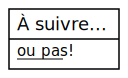

In [175]:
%%mocodo
% Pour aller plus loin...
% Chacune des opérations que Mocodo online présente sous la forme de bouton ou
% de case à cocher consiste en un simple appel à la commande « mocodo » avec
% une séquence fixe d'options. En installant Mocodo, vous pourrez composer ces
% séquences librement, ce qui vous ouvrira d'autres perspectives : création de
% jeux de tests, génération d'examens avec un sujet distinct par étudiant,
% automatisation des corrections, etc. Pour l'heure, l'étape suivante semble
% être la lecture de la documentation (lien en bas de page), qui vous donnera
% un éventail complet des possibilités, et peut-être d'autres idées !

À suivre...: ou pas!

In [17]:
from pathlib import Path
import os
import re

def boxed_text(lines):
    width = len(max(lines, key=len))
    lines[0] = " " * max(0, (width - len(lines[0])) // 2) + lines[0].upper()
    lines[0:0] = [""]
    lines[2:2] = [""]
    lines.append("")
    result = []
    result.append("%" * (width + 6))
    for line in lines:
        spaces = " " * (width - len(line))
        result.append("%  " + line + spaces + "  %")
    result.append("%" * (width + 6))
    result.append("")
    return "\n".join(result)


os.system("rm tutorial_box/*.mcd")
path = Path("tutorial.ipynb")
doc = json.loads(path.read_text())
cells = []
i = 0
titles = []
for cell in doc["cells"]:
    if cell["cell_type"] == "code":
        source = cell["source"]
        if source and source[0].startswith("%%mocodo"):
            title = source[1][1:].strip()
            print(f"{i}. {title}")
            titles.append(f'"{title}"')
            lines = []
            for (j, line) in enumerate(source[1:]):
                if not line.startswith("%"):
                    text = boxed_text(lines) + "".join(source[j+1:])
                    break
                lines.append(line[2:-1])
            Path(f"tutorial_box/tuto-{i:04d}.mcd").write_text(text)
            Path(f"../web/box/tuto-{i:04d}.mcd").write_text(text)
            i += 1
    elif cell["source"] and cell["source"][0].startswith("# Advanced"):
        basic_tutorial_limit = str(i)
print(f"Updated {i} files in tutorial_box folder.")
js_path = Path("../web/mocodo.js")
code = js_path.read_text()
(code, n) = re.subn(r'(?<=var tutorialOptions = )\[.+?\]', f"[{', '.join(titles)}]", code)
if n == 0:
    raise RuntimeError("Unable to update tutorialOptions!")
(code, n) = re.subn(r'(?<=var basicTutorialLimit = )\d+', basic_tutorial_limit, code)
if n == 0:
    raise RuntimeError("Unable to update basicTutorialLimit!")
js_path.write_text(code)
print("Updated mocodo.js.")

0. Tutoriel interactif (1/2)
1. Entité
2. Identifiant et attributs d'entité
3. Identifiant composite
4. Association
5. Cardinalités
6. Attribut d'association
7. Association de dépendance fonctionnelle
8. Association réflexive
9. Schéma relationnel
10. Rôles
11. Diagramme relationnel (1)
12. Diagramme relationnel (2)
13. Inférence de types
14. Génération du DDL
15. Schéma sur plusieurs rangées
16. Réorganisation automatique
17. Réorganisation automatique avec contraintes
18. Pour aller plus loin...
19. Tutoriel interactif (2/2)
20. Entité faible (ou identification relative)
21. Entité faible sans identifiant
22. Identifiants candidats
23. Héritage (ou spécialisation)
24. Agrégation (ou pseudo-entité)
25. Agrégation et contraintes d'unicité
26. Agrégation multiple
27. Contrainte d'intégrité fonctionnelle (CIF)
28. Autres contraintes sur associations
29. Explication interactive d'une contrainte
30. Explication interactive des cardinalités
31. Flèche sur une patte
32. Dévoilement progressi